<a href="https://colab.research.google.com/github/TanyaKumari0204/Sabudh-Internship/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv('/content/Sport car price (1).csv')

In [ ]:
dataset=pd.DataFrame(data=data)

In [ ]:
dataset.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [ ]:
#remove missing
dataset=dataset.dropna()
#remove duplicate
dataset=dataset.drop_duplicates()
#convert non numeric to numeric (label encoding)
for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = pd.factorize(dataset[col])[0]

# Display cleaned dataset
print(dataset.head())



   Car Make  Car Model  Year  Engine Size (L)  Horsepower  Torque (lb-ft)  \
0         0          0  2022                0           0               0   
1         1          1  2021                1           1               1   
2         2          2  2022                2           2               2   
3         3          3  2022                1           3               3   
4         4          4  2021                3           4               4   

   0-60 MPH Time (seconds)  Price (in USD)  
0                        0               0  
1                        1               1  
2                        2               2  
3                        3               3  
4                        4               4  


In [ ]:
dataset.describe()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,9.441301,57.118812,2021.151344,8.420085,39.364922,27.824611,13.482320,144.420085
std,8.101893,41.603927,2.347564,7.298010,26.548524,19.794563,9.940655,101.894228
min,0.000000,0.000000,1965.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,24.000000,2021.000000,3.000000,20.000000,12.000000,6.000000,56.000000
50%,7.000000,44.000000,2021.000000,6.000000,32.000000,26.000000,11.000000,128.000000
75%,14.000000,79.500000,2022.000000,13.000000,55.000000,38.000000,21.000000,219.500000
max,37.000000,175.000000,2023.000000,44.000000,120.000000,91.000000,42.000000,366.000000


In [ ]:
avg_price_by_make= dataset.groupby("Car Make")["Price (in USD)"].mean()
print("Average Price by Car Make:")
print(avg_price_by_make)

Average Price by Car Make:
Car Make
0     121.764706
1     111.659091
2     140.419355
3     128.692308
4     166.854167
5      89.750000
6     180.500000
7     163.027027
8     111.409091
9     151.870968
10    174.692308
11    129.200000
12    172.594595
13    144.619048
14     12.500000
15    142.000000
16    211.913043
17    113.388889
18    200.066667
19     20.000000
20    176.333333
21    195.300000
22    150.181818
23     23.000000
24     24.000000
25     97.333333
26     74.000000
27    163.222222
28    167.642857
29    150.333333
30    152.333333
31    120.000000
32    116.500000
33    158.000000
34    175.000000
35    178.000000
36    212.000000
37    234.000000
Name: Price (in USD), dtype: float64


In [ ]:
avg_hp_by_year = dataset.groupby("Year")["Horsepower"].mean()
print("Average Horsepower by Year:")
print(avg_hp_by_year)

Average Horsepower by Year:
Year
1965    68.000000
2014    22.000000
2015    42.900000
2017    67.000000
2019    43.000000
2020    41.125000
2021    38.871212
2022    38.766917
2023    96.666667
Name: Horsepower, dtype: float64


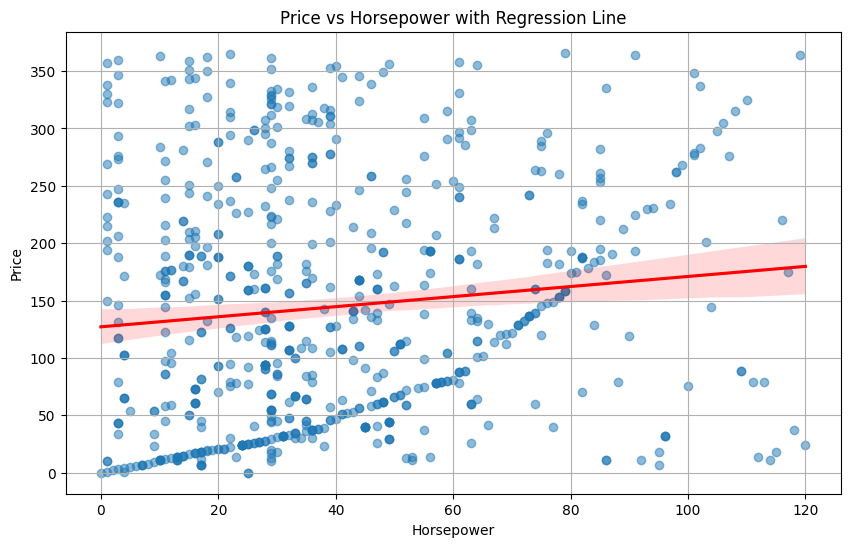

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.regplot(x="Horsepower", y="Price (in USD)", data=dataset, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Price vs Horsepower with Regression Line")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.grid(True)
plt.show()

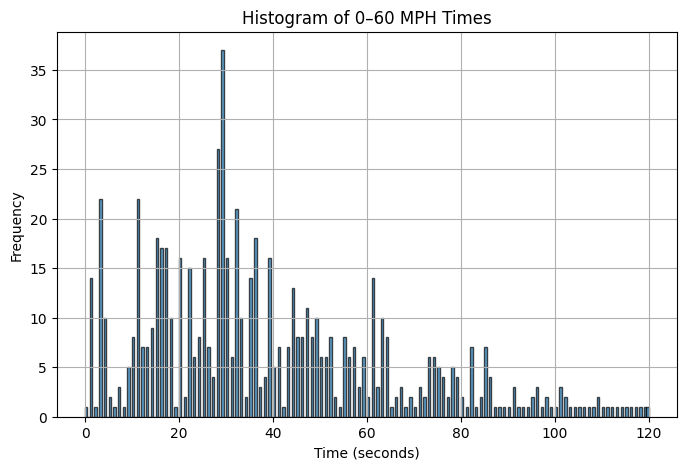

In [ ]:
times = dataset["Horsepower"].dropna()
import numpy as np
# Create bins of size 0.5 seconds
bins = np.arange(times.min(), times.max() + 0.5, 0.5)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(times, bins=bins, edgecolor='black', alpha=0.7)
plt.title("Histogram of 0–60 MPH Times")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
dataset["Price"] = dataset["Price (in USD)"].replace('[\$,]', '', regex=True).astype(float)
high_end_cars = dataset[dataset["Price"] > 500000]

# Sort by horsepower in descending order
high_end_sorted = high_end_cars.sort_values("Horsepower", ascending=False)

# Display result
print("High-End Cars Sorted by Horsepower:")
print(high_end_sorted)

High-End Cars Sorted by Horsepower:
Empty DataFrame
Columns: [Car Make, Car Model, Year, Engine Size (L), Horsepower, Torque (lb-ft), 0-60 MPH Time (seconds), Price (in USD), price, Price]
Index: []


In [ ]:
# Export the cleaned and transformed dataset to a new CSV file
dataset.to_csv("cleaned_sports_car_data.csv", index=False)
